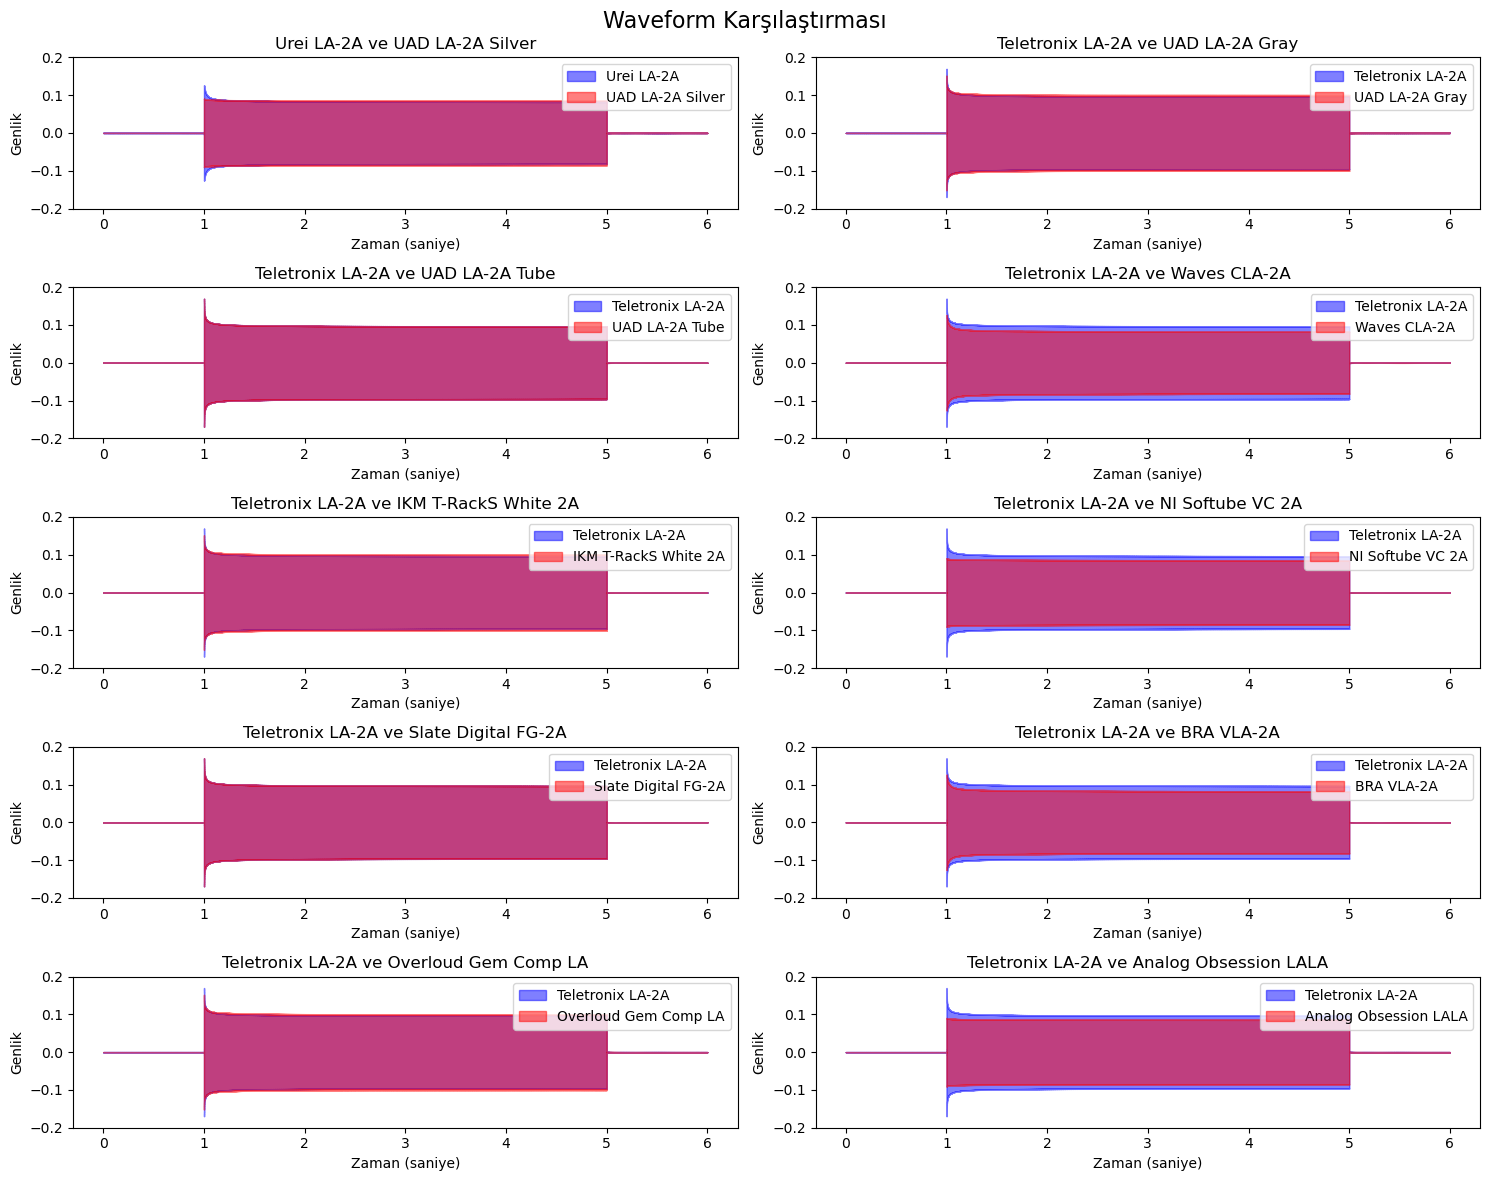

In [6]:
# Farklı ses sinyallerinin dalga biçimlerini (waveform) görselleştirir.
# Ses dosyaları genellikle normalleştirilir, bu da genlik değerlerinin aralığının -1 ile 1 arasında olacağı anlamına gelir.
# Y ekseninde olan sınırlar ses dosyasının bozulmadan (clipping olmadan) işlenmesini sağlar.

# Sabit frekans sinüs dalgası (1 kHz), sıkıştırma davranışını analiz etmek için ilk tercihiniz olmalı.

# Gerekli kütüphanelerin yüklenmesi
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Ses dosyalarının yollarını bir listeye ekleme
audio_files = [
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/1 khz sine LA2A Teletronix_05.wav", 
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/1khz sine LA2A Urei_04.wav",     
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/1 khz sine uad gray render_01.wav",
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/1 khz sine uad silver render_01.wav",
     "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/1 khz sine LA2A Teletronix_05.wav", 
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/1khz sine LA2A Urei_04.wav",     
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/1 khz sine uad gray render_01.wav",
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/1 khz sine uad silver render_01.wav",
     "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/1 khz sine LA2A Teletronix_05.wav", 
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/1khz sine LA2A Urei_04.wav",     
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/1 khz sine uad gray render_01.wav",
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/1 khz sine uad silver render_01.wav",
]

# Her dosya için açıklayıcı isimler
audio_labels = [
    "Teletronix LA-2A",
    "Urei LA-2A",
    "UAD LA-2A Gray",
    "UAD LA-2A Silver",
    "UAD LA-2A Tube",
    "Waves CLA-2A",
    "IKM T-RackS White 2A",
    "NI Softube VC 2A",
    "Slate Digital FG-2A",
    "BRA VLA-2A",
    "Overloud Gem Comp LA",
    "Analog Obsession LALA",
]

# Teletronix LA-2A ile karşılaştırma için ana referans dosyası
teletronix_file = audio_files[0]
teletronix_label = audio_labels[0]
teletronix_wave, teletronix_sr = librosa.load(teletronix_file, sr=None)

# Urei LA-2A ile UAD LA-2A Silver karşılaştırması için özel dosyalar
urei_file = audio_files[1]
urei_label = audio_labels[1]
urei_wave, urei_sr = librosa.load(urei_file, sr=None)

silver_file = audio_files[3]
silver_label = audio_labels[3]
silver_wave, silver_sr = librosa.load(silver_file, sr=None)

# Grafik ayarları
plt.figure(figsize=(15, 12))
plot_idx = 1  # Alt grafiklerin düzenli yerleşimi için sayaç

# 1. Karşılaştırma: Urei LA-2A ve UAD LA-2A Silver
plt.subplot(5, 2, plot_idx)
librosa.display.waveshow(urei_wave, sr=urei_sr, alpha=0.5, color='blue', label=urei_label)
librosa.display.waveshow(silver_wave, sr=silver_sr, alpha=0.5, color='red', label=silver_label)
plt.title(f"{urei_label} ve {silver_label}")
plt.xlabel("Zaman (saniye)")
plt.ylabel("Genlik")
plt.legend(loc="upper right")
plt.ylim((-0.2, 0.2))
plot_idx += 1

# İkinci ve Sonrası: Teletronix LA-2A ile diğer pluginler
for file, label in zip(audio_files[2:], audio_labels[2:]):
    if label in [urei_label, silver_label]:  # Urei ve Silver zaten karşılaştırıldı
        continue
    
    # Diğer ses dosyasını yükle
    other_wave, other_sr = librosa.load(file, sr=None)
    
    # Karşılaştırma grafiği
    plt.subplot(5, 2, plot_idx)
    librosa.display.waveshow(teletronix_wave, sr=teletronix_sr, alpha=0.5, color='blue', label=teletronix_label)
    librosa.display.waveshow(other_wave, sr=other_sr, alpha=0.5, color='red', label=label)
    plt.title(f"{teletronix_label} ve {label}")
    plt.xlabel("Zaman (saniye)")
    plt.ylabel("Genlik")
    plt.legend(loc="upper right")
    plt.ylim((-0.2, 0.2))
    plot_idx += 1

# Genel düzenleme
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle("Waveform Karşılaştırması", fontsize=16)
plt.show()
